In [1]:

from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


import torchvision.transforms.v2 as v2
import torchvision
import torch
import torch.nn as nn

import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchsummary import summary

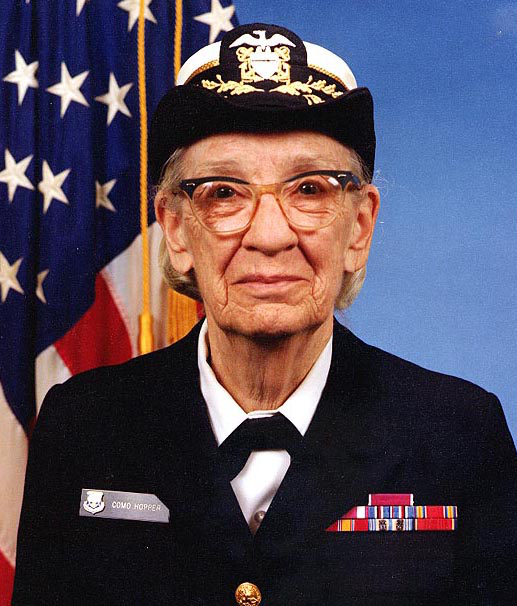

In [2]:
from PIL import Image

img_path = "./data/grace_hopper_517x606.jpg"
Image.open(img_path)

In [4]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
#read_image 함수: 이미지 파일을 읽어 PyTorch의 텐서로 변환합니다. 이 텐서는 기본적으로 [C, H, W] 형식입니다. 여기서 C는 채널 수(예: RGB 이미지의 경우 3), H는 이미지 높이, W는 이미지 너비를 나타냅니다.

img = read_image("./data/grace_hopper_517x606.jpg")
img

tensor([[[ 21,  24,  29,  ...,  82,  70,  72],
         [ 22,  23,  25,  ...,  63,  61,  63],
         [ 20,  21,  22,  ...,  76,  85,  86],
         ...,
         [157, 160, 151,  ...,  13,  12,  12],
         [155, 160, 153,  ...,  12,  12,  12],
         [148, 159, 159,  ...,  13,  13,  13]],

        [[ 26,  29,  34,  ..., 120, 108, 110],
         [ 27,  28,  30,  ..., 101,  99, 101],
         [ 25,  26,  27,  ..., 114, 123, 124],
         ...,
         [ 14,  19,  15,  ...,  12,  11,  11],
         [ 11,  19,  16,  ...,  11,  11,  11],
         [  4,  18,  22,  ...,  12,  12,  12]],

        [[ 82,  85,  90,  ..., 195, 183, 185],
         [ 83,  84,  86,  ..., 176, 174, 176],
         [ 81,  82,  83,  ..., 189, 198, 199],
         ...,
         [ 20,  27,  25,  ...,  18,  17,  17],
         [ 20,  28,  26,  ...,  17,  17,  17],
         [ 13,  27,  32,  ...,  18,  18,  18]]], dtype=torch.uint8)

In [5]:
# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to C:\Users\user/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100.0%


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [6]:
#Faster R-CNN 모델의 기본 전처리 변환(transforms)을 가져오는 것입니다.
weights.transforms()

ObjectDetection()

In [10]:
#preprocess(img)를 사용하여 이미지 img를 전처리한 후, batch 리스트에 추가하고, 그 첫 번째 요소의 shape을 확인
preprocess = weights.transforms()
batch = [preprocess(img)]
batch[0].shape  # 3은 채널 수(즉, RGB 이미지의 경우 3 채널)를 나타내며, 606은 이미지의 높이, 517은 이미지의 너비를 나타냅니다.

torch.Size([3, 606, 517])

In [11]:
weights.meta["categories"][32]

'tie'

In [12]:
#모델이 추론(inference)이나 평가(evaluation) 모드로 전환되며, 이는 모델의 동작 방식에 영향을 미칩니다.
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\torchvision\utils.py:225: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


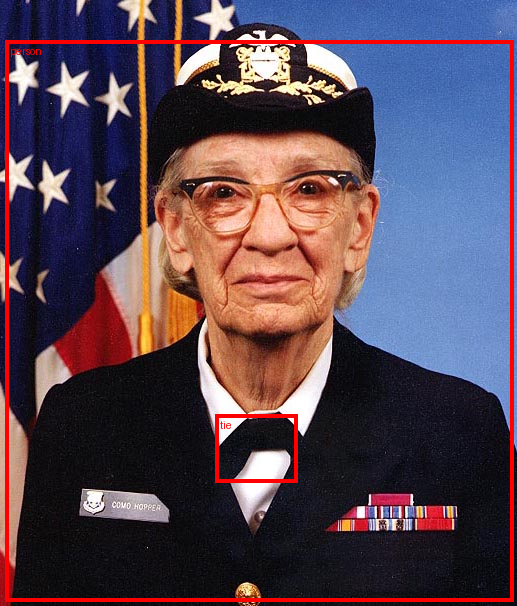

In [15]:
#PyTorch의 torchvision 라이브러리를 사용하여 객체 탐지 모델의 예측 결과를 시각화하는 예제입니다. 
#각 단계는 모델을 사용하여 이미지를 분석하고, 예측된 객체의 경계 상자를 그린 후, 그 결과를 시각화하는 과정을 포함합니다.

from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image


# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]   #model(batch)는 입력 이미지를 모델에 통과시켜 예측을 수행합니다. batch는 전처리된 이미지 텐서로 구성된 리스트입니다.
                               #[0]을 사용하여 첫 번째 이미지만 선택합니다. 모델이 배치 단위로 예측을 반환하므로, 배치의 첫 번째 요소를 선택하여 결과를 저장합니다.

labels = [weights.meta["categories"][i] for i in prediction["labels"]]   #prediction["labels"]는 예측된 객체의 클래스 인덱스를 포함합니다.
                                                                         #weights.meta["categories"]는 클래스 인덱스를 클래스 이름으로 변환하는 데 사용됩니다.

box = draw_bounding_boxes(img, boxes=prediction["boxes"],          # draw_bounding_boxes 함수는 이미지에 경계 상자를 그립니다.img는 원본 이미지입니다.
                                                                   #boxes=prediction["boxes"]는 예측된 객체의 경계 상자 좌표를 제공합니다.


                          labels=labels,                           #labels=labels는 각 경계 상자에 레이블을 추가합니다. 
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())                                  #box.detach()는 계산 그래프에서 분리된 텐서를 반환 /to_pil_image(box.detach())는 텐서를 PIL 이미지로 변환하여 결과 이미지를 시각화합니다.
im

In [16]:
prediction

{'boxes': tensor([[  5.0608,  40.3002, 513.7202, 601.9224],
         [215.8641, 414.0178, 297.2356, 482.0081]], grad_fn=<StackBackward0>),
 'labels': tensor([ 1, 32]),
 'scores': tensor([0.9990, 0.9716], grad_fn=<IndexBackward0>)}